In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from src.utils import sulamerica as sl

In [4]:
df = sl.read_data('data/cases_internacao_SUS.xls')
df = sl.rename_data(df)
df = df[df['AIH_aprovadas']>0]
df.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,sheet_name,period,Regiao
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19,2019-07,NORTE_TOTAL
1,Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,2019-07,NORTE
2,Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,2019-07,NORTE
3,Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,2019-07,NORTE
4,Pará,34774.0,34774.0,28178633.44,21241354.07,248197,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,2019-07,NORTE


In [16]:
df.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [23]:
df['Val_serv_hosp_-_compl_federal'] = pd.to_numeric(df['Val_serv_hosp_-_compl_federal'], errors='coerce')
df['Val_serv_hosp_-_compl_gestor'] = pd.to_numeric(df['Val_serv_hosp_-_compl_gestor'], errors='coerce')

df['Val_serv_prof_-_compl_federal'] = pd.to_numeric(df['Val_serv_prof_-_compl_federal'], errors='coerce')
df['Val_serv_prof_-_compl_gestor'] = pd.to_numeric(df['Val_serv_prof_-_compl_gestor'], errors='coerce')

df.dtypes


Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal    float64
Val_serv_hosp_-_compl_gestor     float64
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal    float64
Val_serv_prof_-_compl_gestor     float64
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [29]:
df['hospitalar_total'] = (df['Valor_serviços_hospitalares'] + df['Val_serv_hosp_-_compl_federal'] + df['Valor_serviços_hospitalares'])
df['servicos_total'] = (df['Val_serv_prof_-_compl_federal'] + df['Val_serv_prof_-_compl_gestor'] + df['Valor_serviços_profissionais'])

# EDA

O primeiro passo será conduzir uma análise exploratória para observar o comportamento das variáveis e extrair alguns insights.
A primeira coisa que vamos fazer é um sanity check para ver se não temos nenhum dados faltando e depois explorar a evolução das principais variáveis no período e tentar entender se existe alguma .


In [36]:
df['period'].value_counts()

2018-05    33
2018-07    33
2018-03    33
2018-09    33
2019-06    33
2019-04    33
2017-12    33
2019-02    33
2018-04    33
2018-11    33
2018-12    33
2018-08    33
2019-01    33
2019-07    32
Name: period, dtype: int64

In [35]:
df['Região/Unidade da Federação'].value_counts()

Paraná                 14
Alagoas                14
Rio Grande do Norte    14
Total                  14
Tocantins              14
Rio de Janeiro         14
Região Sul             14
Bahia                  14
Mato Grosso do Sul     14
Amazonas               14
Região Centro-Oeste    14
Região Nordeste        14
Sergipe                14
Piauí                  14
Santa Catarina         14
Paraíba                14
Rondônia               14
Rio Grande do Sul      14
Amapá                  14
Região Norte           14
Minas Gerais           14
Região Sudeste         14
Maranhão               14
Goiás                  14
Espírito Santo         14
São Paulo              14
Mato Grosso            14
Ceará                  14
Pernambuco             14
Distrito Federal       14
Pará                   14
Roraima                14
Acre                   13
Name: Região/Unidade da Federação, dtype: int64

Como podemos ver esta faltando uma observação para o Estado do Acre no período 2019-07. Dessa forma sabemos que o valor das variáveis da região norte para o período estão subestimados (no caso de variáveis absolutas e.g. internações, valores e etc.).

Agora Vamos ver a evolução de algumas variáveis. Primeiro vamos olhas em um nível mais macro.

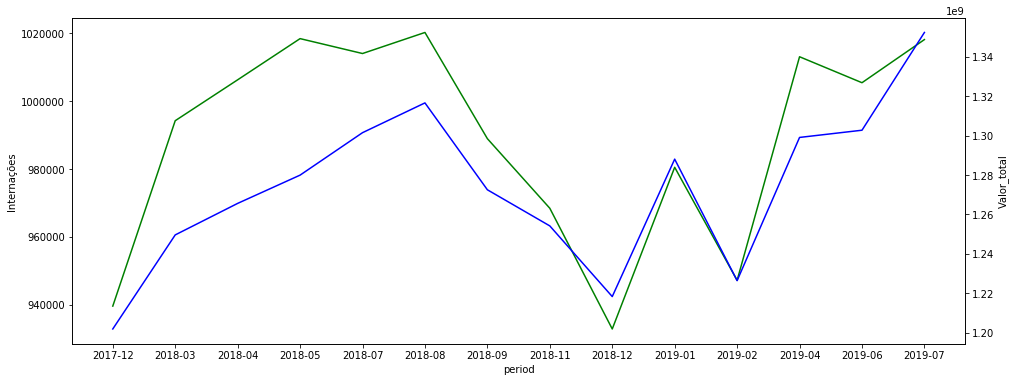

In [30]:
temp_df = df[df['Região/Unidade da Federação']=='Total'].sort_values(by=['period'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Internações', data=temp_df, sort=True, color='g')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_total', data=temp_df,  ax=ax2, sort=True, color='b')


Como esperado existe uma correlação positiva entre o número total de internações e o valor total gasto.


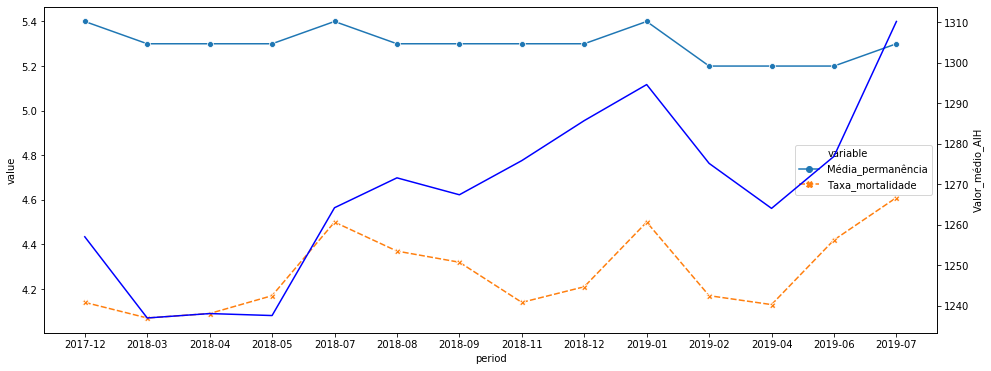

In [11]:
plt.figure(figsize=(16, 6))

melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade']) 
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable")
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_médio_AIH', data=temp_df,  ax=ax2, sort=True, color='b', markers=True)

A taxa de mortalidade aparentemente vem crescendo levemente. É interessante observar que ocorreu uma queda na média de permanência, especialmente apartir de 2019-02. Outro fato interessante é que mesmo com uma queda na média de permanência o valor médio da AIH vem aumentando constantemente

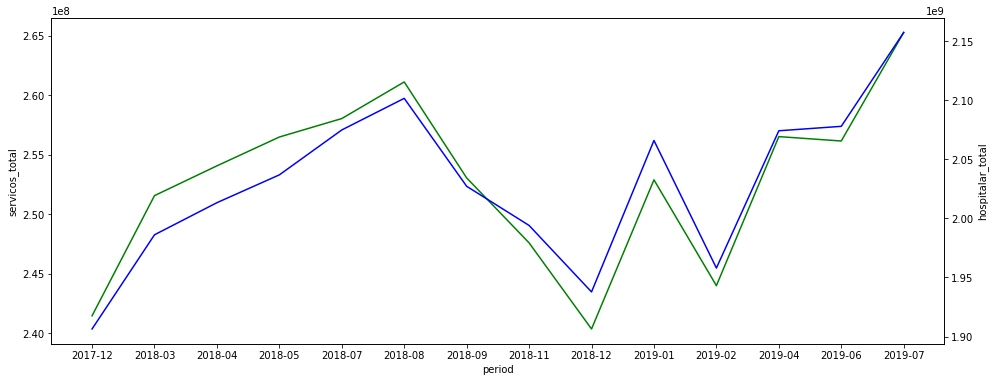

In [33]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='servicos_total', data=temp_df, sort=True, color='g', legend='full')
ax2 = plt.twinx()
sns.lineplot(x='period', y='hospitalar_total', data=temp_df,  ax=ax2, sort=True, color='b')